This function is written to plot the scaling law of the PDE and compare it with the scaling the we get from the ML model. This function can also we used to plot the other long term behaviour of the ML model.

To do list for today:
1- Plotting rthe scaling for earthquakes first.

In [28]:
# loading the data 
from Forward2d import forwardmodel
import cte_eq
import pickle
import numpy as np
import sys
sys.path.append('./..')
import ProcessFunctions
import matplotlib.pyplot as plt
import cte
from scipy import integrate

In [29]:
T_final=10500
drs=0.012
Nxout=cte_eq.Nxout
Ntout=cte_eq.Ntout
direct='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/2DSim_MainSimulation_Tf'+str(T_final)+"Nx="+str(Nxout)+"Nt="+str(Ntout)+'drs'+str(drs)+".npz"
data=np.load(direct)
v=data['v']
# theta=data['theta']
# tau=data['tau']
# slip=data['slip']
t=data['t']
a=data['a']


In [18]:
L=240e3
Nx=a.shape[0]
delta_x=L/Nx
v=np.array(v)
# theta=np.array(theta)
t=np.array(t)
Nt=t.shape[0]//Nx
t=t.reshape((Nt,Nx)) 
v=v.reshape((Nt,Nx))

In [19]:
# pdot is the the integral of v over space
pdot=np.sum(v,axis=1)*delta_x

In [20]:
pdot.shape

(38140,)

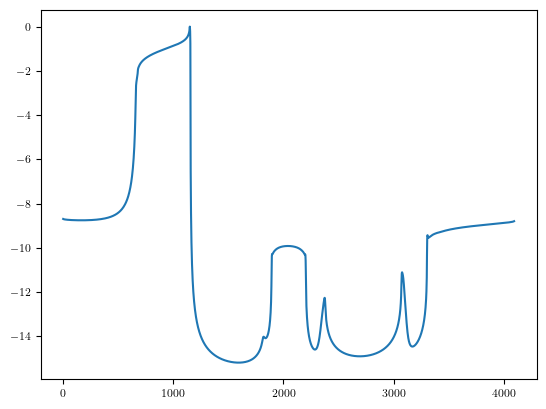

In [21]:
plt.plot(np.log10(v[600,:]))

In [23]:
# finding the mements, durations, and are for each event
flag_event=False
V_event=1e-2
T1s=[] # this is the time of the start of events
T2s=[] # this is the time of the end of events
length_ruptures=[] # this is the length of the rupture
pots=[] # integral of pdot over the event duration
for i in range(1,200):
    if np.max(v[i,:])>V_event and flag_event==False:
        start=i
        T1s.append(t[i,0])
        flag_event=True
    if np.max(v[i,:])<V_event and flag_event==True:
        end=i
        flag_event=False
        T2s.append(t[i,0])
        # check from start to end for all elements of v[start,:] to v[end,:] which elements had v >v_event in one line, from this you can find the event extent
        ruptured=np.where(v[start:end,:]>V_event,1,0)
        # find the locations at which at least there is one element that is ruptured
        ruptured=np.sum(ruptured,axis=0)
        ruptured=(ruptured>0)
        # summing number of ruptured elements
        num_ruptured_elements=np.sum(ruptured)
        # then the rupture length of this event is given by 
        length_rupture=num_ruptured_elements*delta_x
        length_ruptures.append(length_rupture)
        potency_of_event=integrate.cumtrapz(pdot[start:end],t[start:end,0])    
        pots.append(potency_of_event[-1])
# now I have everything to plot the scaling law for the earthquake problem

In [24]:
print("T1s",np.array(T1s)/cte.t_yr)
print("T2s",np.array(T2s)/cte.t_yr)
print("length_rupture",length_rupture)

T1s [51.1603698]
T2s [51.16037385]
length_rupture 77519.53125


In [25]:
start

10

In [26]:
end

196

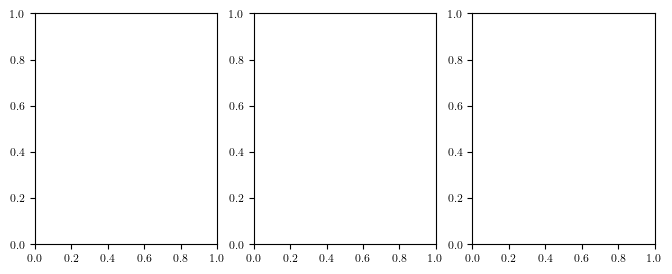

In [27]:
# make a figure with
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'text.usetex': True,  # If you want to use LaTeX for rendering text
})
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

plt.rcParams.update({'font.family': 'serif', 'font.serif': 'Times New Roman','font.size': 8})


